- **Non-parametric regression with the fixed design!!**

- We consider the following nonparametric regression model

$$ Y_k = f(X_k) + \xi_k, \quad k = 1, \ldots, n ,$$

where $\xi_k$  are independent random variables with $\mathbb{E}\xi_k = 0$ and Var$\xi_k = \sigma_k^2.$

- Assume that $X_k = \frac{1}{k}, f \in L^2([0,1])$ and $\lbrace \varphi_j \rbrace_{j \in \mathbb{N}}$ be the `orthonormal basis` of $L^2([0,1])$

- Let 
$$\theta_j = \int_0^1 f(x) \varphi_j(x) dx,$$ 
be the Fourier coefficient of $f$ with respect to $\lbrace \varphi_j \rbrace_{j \in \mathbb{N}}$ and
$$f(x) = \sum_{j \in \mathbb{N}} \theta_j \varphi_j(x)$$

- The `projection estimation` of $f$ is its projection 
$$\sum_{j = 1}^{M} \theta_j \varphi_j(x)$$

- In fact, $f$ is an unknown function, so the approximation of $\theta_j$ can be calculated by the sums
$$ \frac{1}{n} \sum_{k = 1}^n f(X_k) \varphi_j(X_k), $$
Replacing in these sums the unknown quantities $f(X_i)$ by the observations Yi we obtain the following estimators of $\theta_j$
$$ \widehat{\theta}_j = n^{-1} \sum_{k = 1}^n Y_i \varphi_j(X_k) $$
since $\mathbb{E} Y_i = f(X_i), \quad \forall i$


- For $M \geq 1$, The `projection estimator` (or *an orthogonal series estimator*) of the `regression_function` $f$ at $x$ is defined as
$$ \widehat{f}_{n, M}(x) = \sum_{j=1}^M \widehat{\theta}_j \varphi_j(x) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {"figure.figsize" : (14, 6)})

n = 100

In this case; we take $f(x) = \sin 2\pi x$ and $\xi = \mathcal{N}(0, 0.1)$

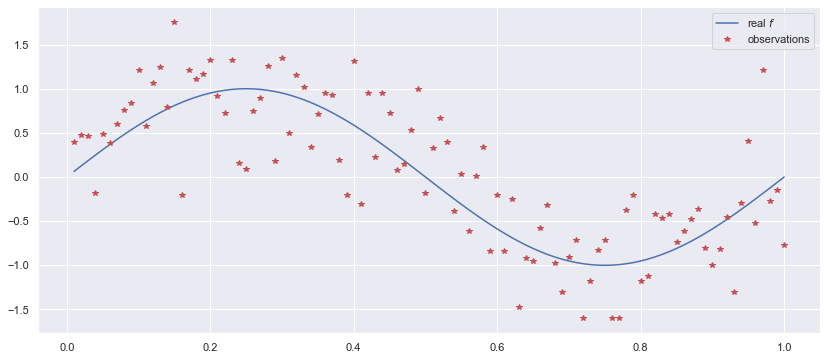

In [2]:
x = np.linspace(1/n, 1, n)
eps = np.random.normal(0, 0.5, n)
f_real = np.sin(2*np.pi*x)
Y = f_real + eps

## Display
plt.plot(x, f_real, label = 'real $f$')
plt.plot(x, Y, 'r*', label = 'observations')
plt.legend()
plt.show()

**Comment 1. Plot the estimators of the Fourier coefficients**

In this case; we consider the second Fourier coefficient; that is
$$ \theta_2 = \int_0^1 f(x) \varphi_2(x) dx =  \frac{4 \sqrt{2}}{3\pi} $$
since $f(x) = \sin 2\pi x$ and $\varphi_1(x) = \sqrt{2} \cos \pi x$

We have the empirical estimator of $\theta_2$ is
$$ \widehat{\theta_2} = n^{-1} \sum_{i=1}^n Y_i \varphi_2(x_i) $$

Now, for $n \in (20, 10000)$ steped by 100, we have

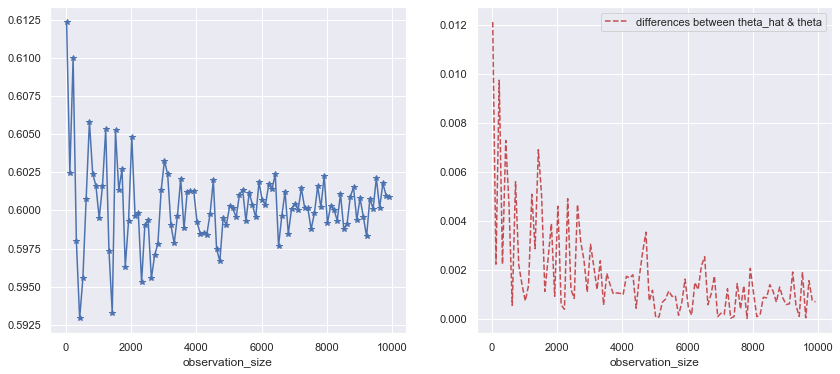

In [3]:
obs_size = np.arange(20, 10000, 100)
theta_2_hats = []
diff_thetas = []

for n in obs_size:
    x = np.linspace(1/n, 1, n)
    Eps = np.random.normal(0, 0.1, n)
    F_real = np.sin(2 * np.pi * x)
    y = F_real + Eps
    varphi_2 = np.sqrt(2) * np.cos(np.pi*x)
    theta_2 = 4*np.sqrt(2) / (3*np.pi)
    theta_2_hat = np.mean(y * varphi_2)
    theta_2_hats.append(theta_2_hat)
    diff_thetas.append(abs(theta_2_hat - theta_2)) 

plt.subplot(121)    
plt.plot(obs_size, theta_2_hats, '-*')
plt.xlabel('observation_size')
plt.subplot(122)
plt.plot(obs_size, diff_thetas, 'r--', label = 'differences between theta_hat & theta')
plt.xlabel('observation_size')
plt.legend()
plt.show()

Look at the figure, we can see that, when the sample size is large enough, then the difference

$$ \vert \theta_2 - \widehat{\theta_2} \vert \to 0; $$

and morover $\widehat{\theta_2}$ is an `unbiased estimator` for $\theta_2$ since $$\mathbb{E}\widehat{\theta_2} = \theta_2.$$

**Comment 2.** Now, let's begin estimate the funtion $f$ by using the `projection estimator`

Recall that the `trigonometric basis` in $L^2([0, 1])$ is defined by:
$$ \begin{array}{cll} \varphi_1(x) &=& 1 \\ \varphi_{2k}(x) &=& \sqrt{2} \cos(k\pi x) \\ \varphi_{2k+1}(x) &=& \sqrt{2} \sin(k\pi x)  \end{array} $$

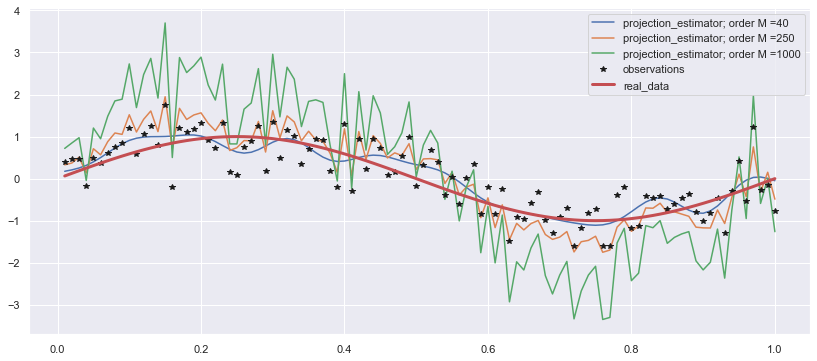

In [4]:
param_orders = [40, 250, 1000]
n = 100
x = np.linspace(1/n, 1, n)
f_hat = np.array(len(x)*[0])
theta_hat = []
pi = np.pi

for M in param_orders:
    for k in np.arange(1, M, 1):
        if k == 1:
            phi_k = np.array(len(x)*[1])

        elif(k % 2 == 0):
            phi_k = np.sqrt(2)*np.cos(pi*(k/2)*x)

        else:
            phi_k = np.sqrt(2)*np.sin(pi*((k-1)/2)*x)

        theta_hat = np.mean(Y * phi_k)
        f_hat = f_hat + theta_hat * phi_k

    plt.plot(x, f_hat, label = 'projection_estimator; order M ='+str(M))


plt.plot(x, Y, 'k*', label = 'observations')    
plt.plot(x, f_real, 'r', label = 'real_data', linewidth=3.0)    
plt.legend()

**Intuition & explain:**
- The choice of `very large M` `(M = 10000)` leads to `undersmoothing`, whereas for `small` values of `M` (M = 40) `oversmoothing` occurs

- The parameter `M` (called the `order` of the `projection estimator`) plays the role as a smoothing parameter, i.e., a parameter whose choice is crucial for establishing the balance between bias and variance. 